In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## parmaters 1
ConsiderTC1 = 1
ConsiderMB1 = 1
informal1 = 0.11
discount1 = 0.02
scenario1 = 'val'

## parmaters 2
ConsiderTC2 = 1
ConsiderMB2 = 1
informal2 = 0
discount2 = 0.02
scenario2 = 'val'


In [3]:
# only keep results
df_input = pd.read_csv('results/aggregate_results_imputed.csv')
# df_input = pd.read_csv('imputation/aggregate_results_imputed.csv')

df = df_input[(df_input['discount']==discount1)&
        (df_input['ConsiderTC']==ConsiderTC1)&
        (df_input['ConsiderMB']==ConsiderMB1)&
        (df_input['informal']==informal1)&
        (df_input['discount']==discount1)&
        (df_input['scenario']==scenario1)]
df = df.reset_index().drop(columns=['index'])
df = df[df['tax'] > 0]

df2 = df_input[(df_input['discount']==discount2)&
        (df_input['ConsiderTC']==ConsiderTC2)&
        (df_input['ConsiderMB']==ConsiderMB2)&
        (df_input['informal']==informal2)&
        (df_input['discount']==discount2)&
        (df_input['scenario']==scenario2)]
df2 = df2.reset_index().drop(columns=['index'])
df2 = df2[df2['tax'] > 0]

df = df.groupby('Country Code').sum().reset_index()
df2 = df2.groupby('Country Code').sum().reset_index()

countries_info = pd.read_csv('data/dl1_countrycodeorg_country_name.csv')
countries_info = countries_info[['Country Code', 'Region', 'Income group']]
codemap = countries_info.dropna()
df = df.merge(codemap, on='Country Code')
df2 = df2.merge(codemap, on='Country Code')

print(df.head())
print(len(df))

  Country Code  ConsiderTC  ConsiderMB  informal  discount      GDPloss  \
0          AFG           1           1      0.11      0.02    49.896032   
1          AGO           1           1      0.11      0.02    48.042942   
2          ALB           1           1      0.11      0.02    33.500875   
3          AND           1           1      0.11      0.02     6.078215   
4          ARE           1           1      0.11      0.02  1220.771360   

        tax        pc_loss                      Region         Income group  
0  0.020504     953.788823                  South Asia           Low income  
1  0.009700     916.328300          Sub-Saharan Africa  Lower middle income  
2  0.025102   12406.792105       Europe & Central Asia  Upper middle income  
3  0.036537   78339.598149       Europe & Central Asia          High income  
4  0.040730  116219.612453  Middle East & North Africa          High income  
199


In [4]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,1,1,0.0,0.02,5.609535,0.002305,107.229213,South Asia,Low income
1,AGO,1,1,0.0,0.02,7.192418,0.001452,137.181783,Sub-Saharan Africa,Lower middle income
2,ALB,1,1,0.0,0.02,2.139839,0.001603,792.473007,Europe & Central Asia,Upper middle income
3,AND,1,1,0.0,0.02,0.590515,0.003550,7610.899941,Europe & Central Asia,High income
4,ARE,1,1,0.0,0.02,115.389211,0.003850,10985.258808,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,1,1,0.0,0.02,0.218415,0.003954,939.875236,East Asia & Pacific,Lower middle income
195,YEM,1,1,0.0,0.02,6.544641,0.001778,166.188726,Middle East & North Africa,Low income
196,ZAF,1,1,0.0,0.02,59.237430,0.003009,870.857122,Sub-Saharan Africa,Upper middle income
197,ZMB,1,1,0.0,0.02,3.424593,0.001562,123.342810,Sub-Saharan Africa,Lower middle income


In [5]:
data = df[['GDPloss','Country Code']].merge(df2[['GDPloss','Country Code']],on='Country Code')

In [6]:
data['TC'] = 1-data['GDPloss_y']/data['GDPloss_x']

In [7]:
data

,GDPloss_x,Country Code,GDPloss_y,TC
0,49.896032,AFG,5.609535,0.887576
1,48.042942,AGO,7.192418,0.850292
2,33.500875,ALB,2.139839,0.936126
3,6.078215,AND,0.590515,0.902847
4,1220.771360,ARE,115.389211,0.905478
...,...,...,...,...
194,2.331712,WSM,0.218415,0.906329
195,53.316416,YEM,6.544641,0.877249
196,408.305280,ZAF,59.237430,0.854919
197,18.956172,ZMB,3.424593,0.819342


In [8]:
data[data['Country Code']=='CHN']

,GDPloss_x,Country Code,GDPloss_y,TC
34,23714.319494,CHN,3174.053468,0.866155


In [9]:
data[data['Country Code']=='USA']

,GDPloss_x,Country Code,GDPloss_y,TC
188,36180.701785,USA,5737.417128,0.841423


In [10]:
data.sort_values('TC', ascending=False)

,GDPloss_x,Country Code,GDPloss_y,TC
100,17.843630,LBN,0.396087,0.977802
186,41.819365,UKR,1.079639,0.974183
77,267.768820,HRV,8.732583,0.967388
70,305.141751,GRC,11.190698,0.963326
147,554.135219,PRT,24.948065,0.954978
...,...,...,...,...
92,69.489682,KEN,16.544463,0.761915
140,188.486647,PER,46.509473,0.753248
52,106.916081,ECU,28.562397,0.732852
123,18.576165,MOZ,5.932260,0.680652


In [11]:
ratio = (1-df2.groupby('Income group').sum()['GDPloss']/df.groupby('Income group').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Income group,TC
0,High income,87.613912
1,Upper middle income,87.736797
2,Low income,88.475238
3,Lower middle income,92.910792


In [12]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,1,1,0.0,0.02,5.609535,0.002305,107.229213,South Asia,Low income
1,AGO,1,1,0.0,0.02,7.192418,0.001452,137.181783,Sub-Saharan Africa,Lower middle income
2,ALB,1,1,0.0,0.02,2.139839,0.001603,792.473007,Europe & Central Asia,Upper middle income
3,AND,1,1,0.0,0.02,0.590515,0.003550,7610.899941,Europe & Central Asia,High income
4,ARE,1,1,0.0,0.02,115.389211,0.003850,10985.258808,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,1,1,0.0,0.02,0.218415,0.003954,939.875236,East Asia & Pacific,Lower middle income
195,YEM,1,1,0.0,0.02,6.544641,0.001778,166.188726,Middle East & North Africa,Low income
196,ZAF,1,1,0.0,0.02,59.237430,0.003009,870.857122,Sub-Saharan Africa,Upper middle income
197,ZMB,1,1,0.0,0.02,3.424593,0.001562,123.342810,Sub-Saharan Africa,Lower middle income


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


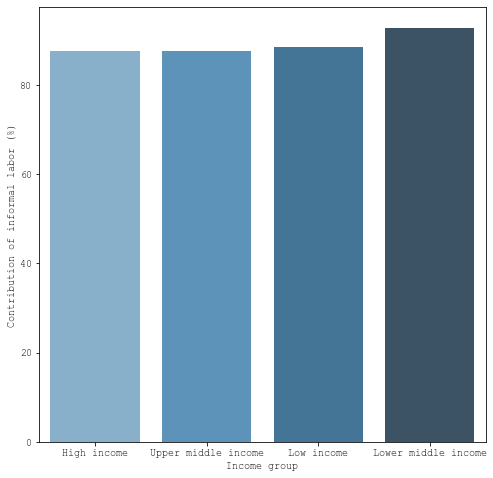

In [13]:
plt.rcParams['font.family']='Courier New, monospace'
fig, ax = plt.subplots(figsize=(8,8))  # create figure & 1 axis
ax = sns.barplot("Income group", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of informal labor (%)')
plt.savefig('tables/figure_S6.pdf')

In [14]:
ratio = (1 - df2.groupby('Region').sum()['GDPloss']/df.groupby('Region').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Region,TC
0,North America,84.417548
1,Latin America & Caribbean,86.012649
2,Sub-Saharan Africa,87.385049
3,East Asia & Pacific,87.528705
4,Middle East & North Africa,89.187796
5,Europe & Central Asia,90.818763
6,South Asia,95.231760


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


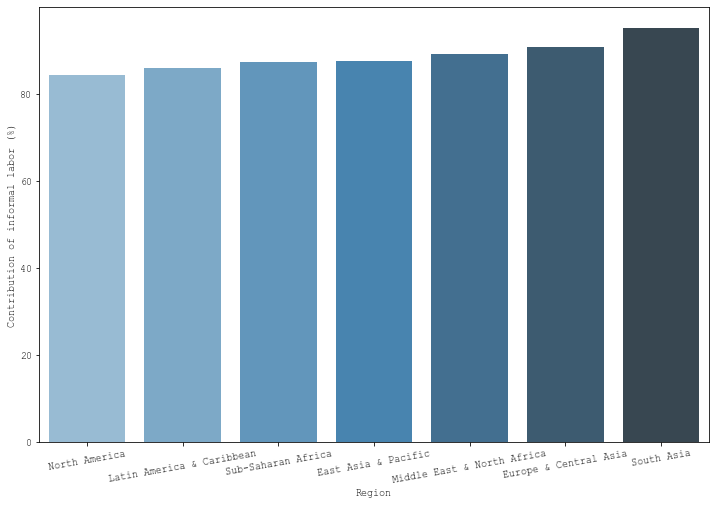

In [15]:
fig, ax = plt.subplots(figsize=(12,8))  # create figure & 1 axis
ax = sns.barplot("Region", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of informal labor (%)')
plt.xticks(rotation=10)
plt.savefig('tables/figure_S7.pdf')